<a href="https://colab.research.google.com/github/W-Bernau/QiskitAlgorithms/blob/main/VQC_Machine_Learning_for_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from qiskit.circuit.library import TwoLocal, ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler
from qiskit_machine_learning.algorithms import VQC
from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit.circuit.library import ZZFeatureMap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

seed = 1376
algorithm_globals.random_seed = seed

diabetesData = load_diabetes()

print(diabetesData.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [47]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC

features = diabetesData.data
labels = diabetesData.target

features = MinMaxScaler().fit_transform(features)


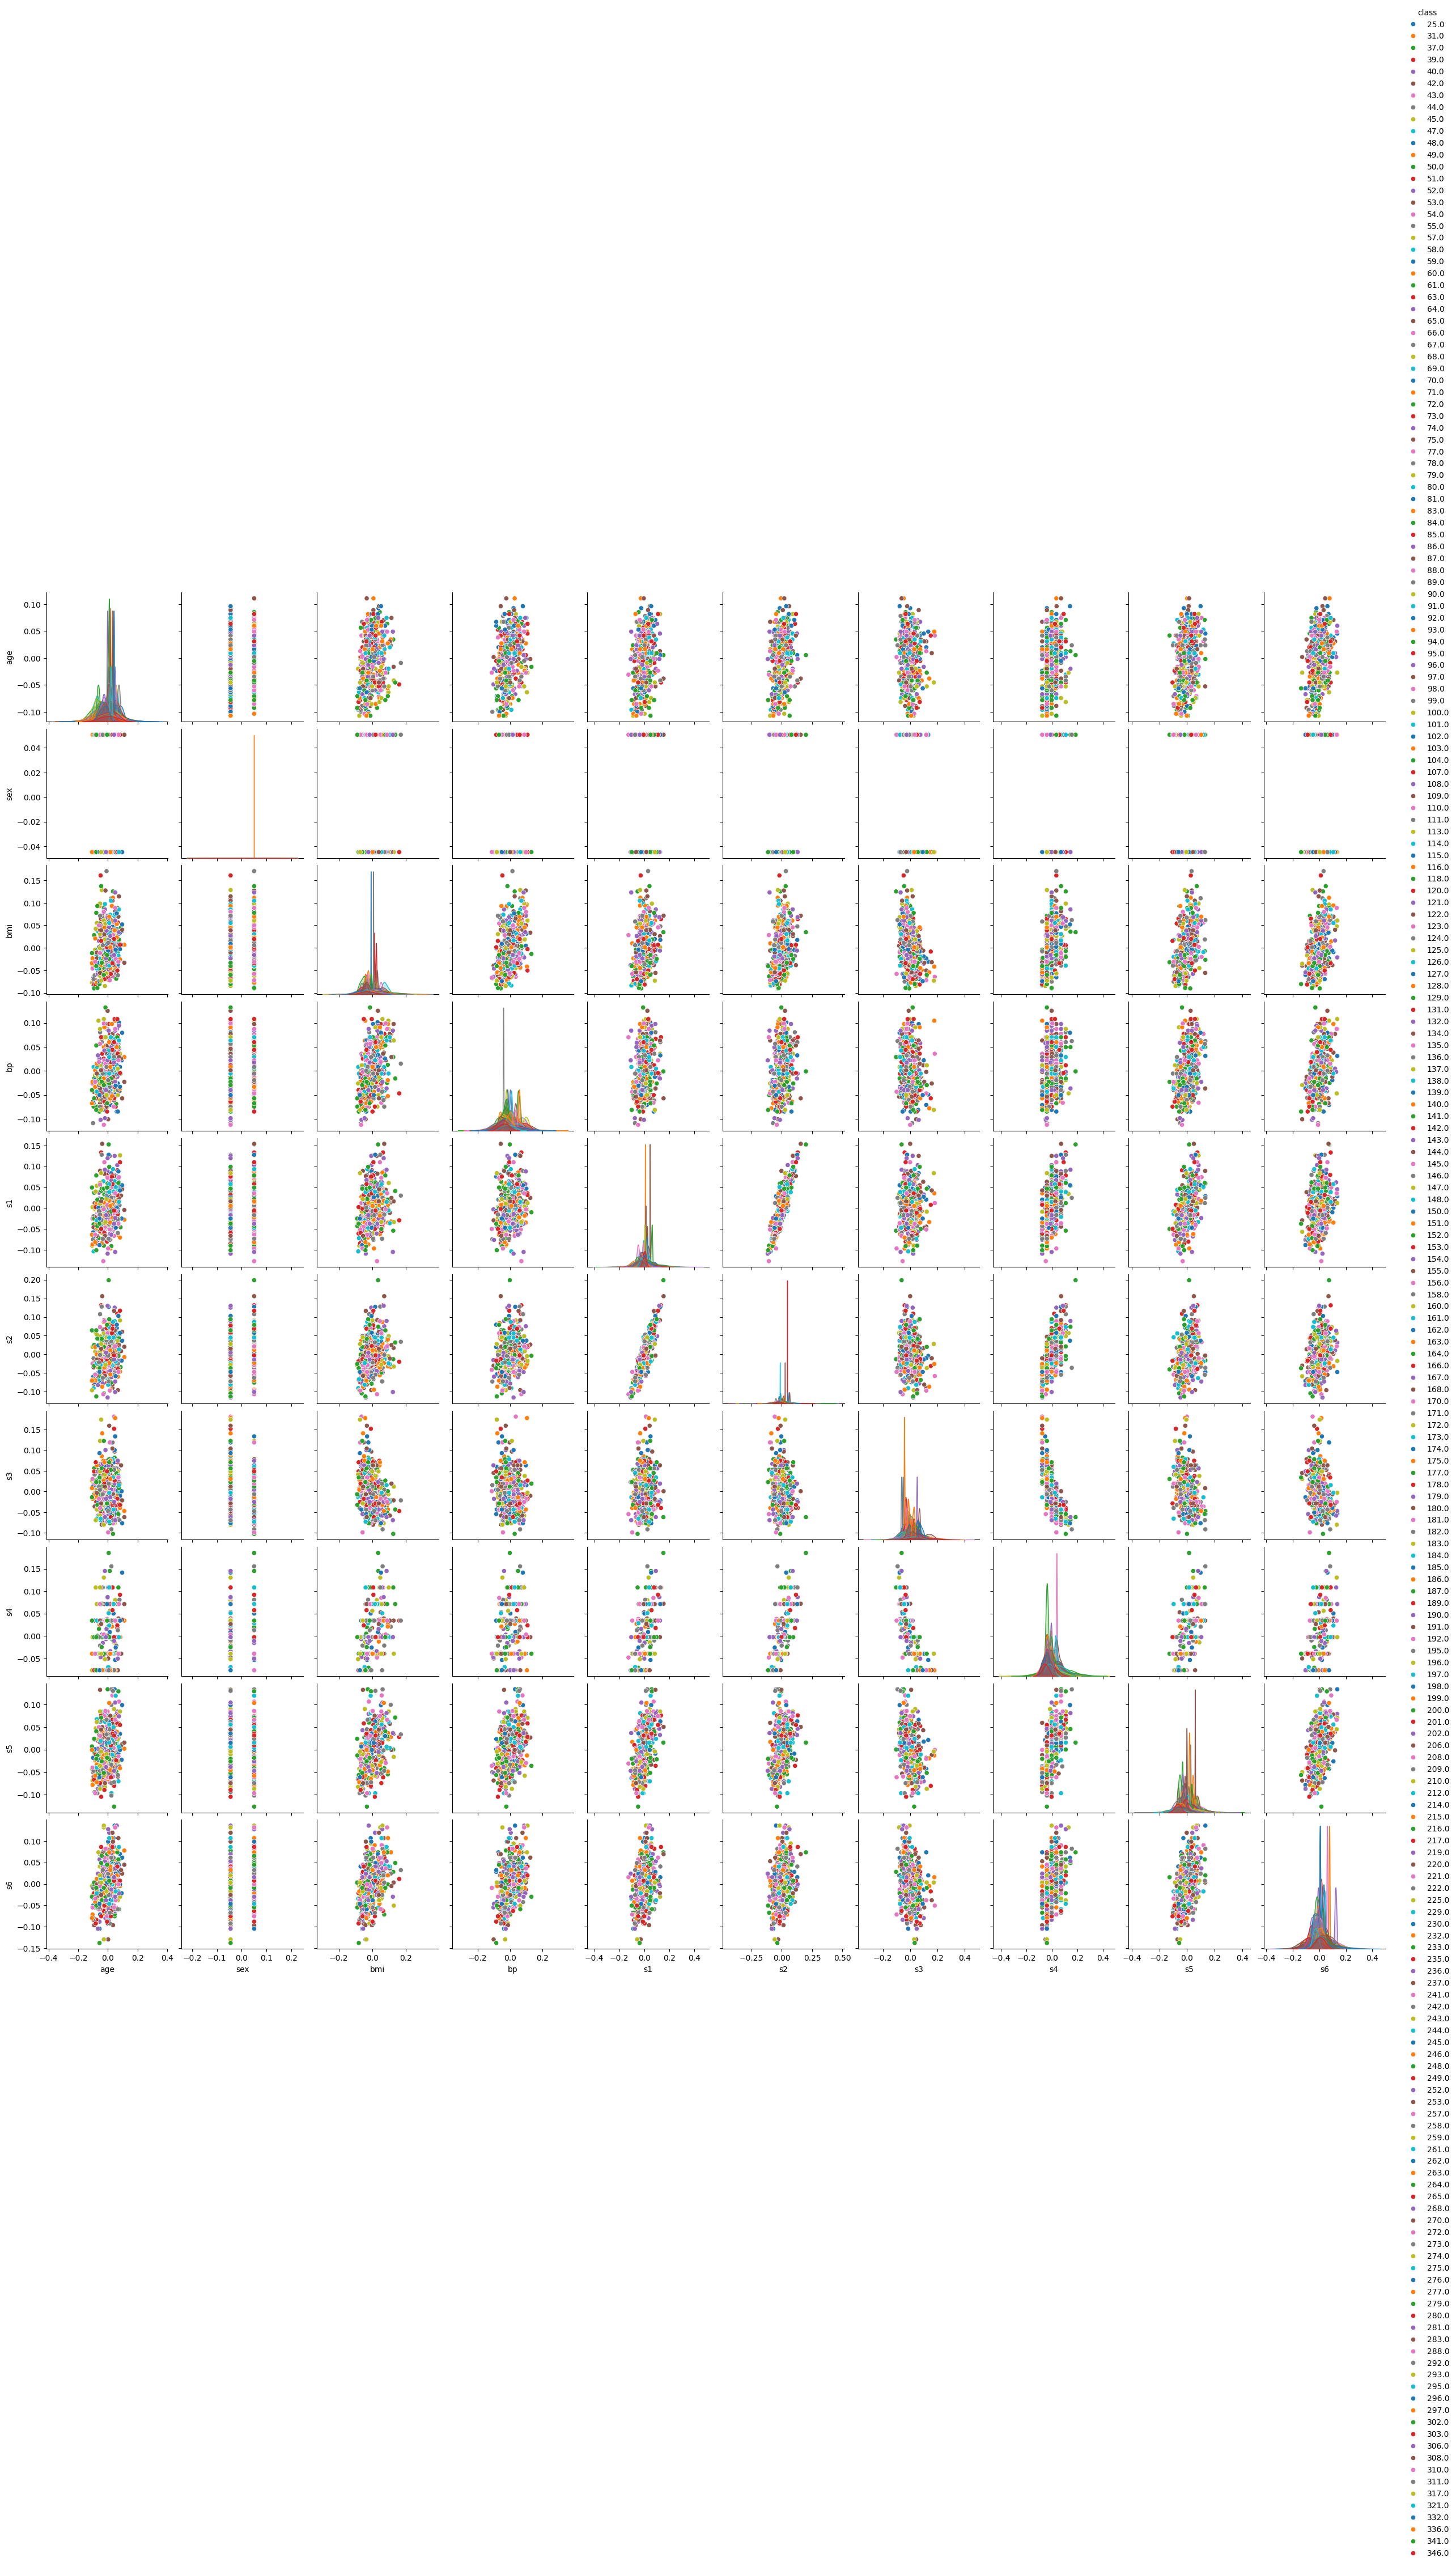

In [46]:
df = pd.DataFrame(diabetesData.data, columns=diabetesData.feature_names)
df["class"] = pd.Series(diabetesData.target)

sns.pairplot(df, hue="class", palette="tab10")

In [16]:
num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(style="clifford")

┌───┐┌─────────────┐                                               »
q_0: ┤ H ├┤ P(2.0*x[0]) ├──■────────────────────────────────────■────■──»
     ├───┤├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐  │  »
q_1: ┤ H ├┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├──┼──»
     ├───┤├─────────────┤└───┘└──────────────────────────────┘└───┘┌─┴─┐»
q_2: ┤ H ├┤ P(2.0*x[2]) ├──────────────────────────────────────────┤ X ├»
     ├───┤├─────────────┤                                          └───┘»
q_3: ┤ H ├┤ P(2.0*x[3]) ├───────────────────────────────────────────────»
     ├───┤├─────────────┤                                               »
q_4: ┤ H ├┤ P(2.0*x[4]) ├───────────────────────────────────────────────»
     ├───┤├─────────────┤                                               »
q_5: ┤ H ├┤ P(2.0*x[5]) ├───────────────────────────────────────────────»
     ├───┤├─────────────┤                                               »
q_6: ┤ H ├┤ P(2.0*x[6]) ├───────────────────────────────────────────────»
     ├───┤├─────────────┤                                               »
q_7: ┤ H ├┤ P(2.0*x[7]) ├───────────────────────────────────────────────»
     ├───┤├─────────────┤                                               »
q_8: ┤ H ├┤ P(2.0*x[8]) ├───────────────────────────────────────────────»
     ├───┤├─────────────┤                                               »
q_9: ┤ H ├┤ P(2.0*x[9]) ├───────────────────────────────────────────────»
     └───┘└─────────────┘                                               »
«                                                    »
«q_0: ──────────────────────────────────■─────────■──»
«                                       │         │  »
«q_1: ──────────────────────────────────┼────■────┼──»
«     ┌──────────────────────────────┐┌─┴─┐┌─┴─┐  │  »
«q_2: ┤ P(2.0*(π - x[0])*(π - x[2])) ├┤ X ├┤ X ├──┼──»
«     └──────────────────────────────┘└───┘└───┘┌─┴─┐»
«q_3: ──────────────────────────────────────────┤ X ├»
«                                               └───┘»
«q_4: ───────────────────────────────────────────────»
«                                                    »
«q_5: ───────────────────────────────────────────────»
«                                                    »
«q_6: ───────────────────────────────────────────────»
«                                                    »
«q_7: ───────────────────────────────────────────────»
«                                                    »
«q_8: ───────────────────────────────────────────────»
«                                                    »
«q_9: ───────────────────────────────────────────────»
«                                                    »
«                                                         »
«q_0: ───────────────────────────────────────■─────────■──»
«                                            │         │  »
«q_1: ──────────────────────────────────■────┼────■────┼──»
«     ┌──────────────────────────────┐┌─┴─┐  │    │    │  »
«q_2: ┤ P(2.0*(π - x[1])*(π - x[2])) ├┤ X ├──┼────┼────┼──»
«     ├──────────────────────────────┤└───┘┌─┴─┐┌─┴─┐  │  »
«q_3: ┤ P(2.0*(π - x[0])*(π - x[3])) ├─────┤ X ├┤ X ├──┼──»
«     └──────────────────────────────┘     └───┘└───┘┌─┴─┐»
«q_4: ───────────────────────────────────────────────┤ X ├»
«                                                    └───┘»
«q_5: ────────────────────────────────────────────────────»
«                                                         »
«q_6: ────────────────────────────────────────────────────»
«                                                         »
«q_7: ────────────────────────────────────────────────────»
«                                                         »
«q_8: ────────────────────────────────────────────────────»
«                                                         »
«q_9: ────────────────────────────────────────────────────»
«                                                         »
«                                   

In [53]:
from qiskit.circuit.library import RealAmplitudes
from qiskit.primitives import Sampler
from IPython.display import clear_output

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
optimizer = COBYLA(maxiter=100)
sampler = Sampler()


objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)



def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [58]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

algorithm_globals.random_seed = 12
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)



svc = SVC()
_ = svc.fit(train_features, train_labels)  # suppress printing the return value

train_score_c4 = svc.score(train_features, train_labels)
test_score_c4 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")


Classical SVC on the training dataset: 0.08
Classical SVC on the test dataset:     0.01


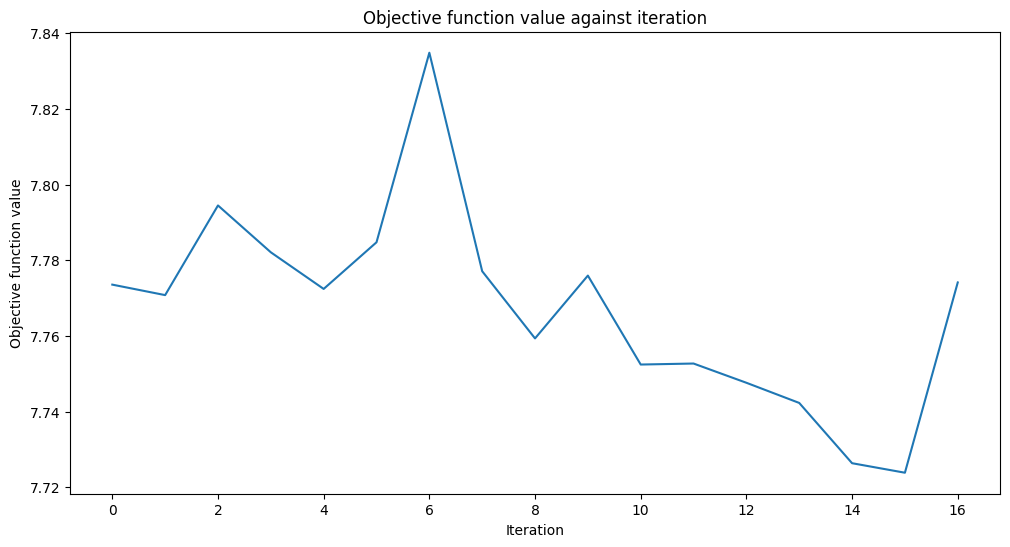

In [ ]:
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history

objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [ ]:
train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)
print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")